In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import Imputer
from warnings import simplefilter
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import ast
import string
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
#read dataset
data =pd.read_csv("Downloads/hackathon_rentomter_nobroker.csv")
data.head()

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent,deposit
0,ff8081815917971401591af8895032d0,BHK2,Jayanagara,05-07-2018 17:09,12.936601,77.576914,FAMILY,0,0,0,...,S,2,2,2,"{""LIFT"":False,""GYM"":False,""INTERNET"":False,""AC...",CORP_BORE,IF,1,22000,220000
1,ff80818157dbe1fb0157dc4aa07513dc,BHK2,Basaveshwar Nagar,30-12-2017 17:22,12.997989,77.545219,FAMILY,0,0,0,...,W,2,0,1,"{""LIFT"":False,""GYM"":False,""INTERNET"":False,""AC...",CORPORATION,IH,0,20000,200000
2,ff8081815d304406015d30edcd7c4f44,BHK3,"Jaya Nagar East,Jayanagar",11-07-2017 15:42,12.935696,77.587642,FAMILY,0,1,0,...,E,3,4,9,"{""LIFT"":True,""GYM"":False,""INTERNET"":True,""AC"":...",CORPORATION,AP,2,38000,250000
3,ff8081815b106986015b154d908f2ac2,BHK2,Murugeshpalya,07-07-2018 14:26,12.953507,77.656118,FAMILY,0,1,0,...,E,2,4,4,"{""LIFT"":True,""GYM"":False,""INTERNET"":True,""AC"":...",BOREWELL,AP,1,30000,300000
4,ff8081815e80b789015e84a7a42a62a3,BHK2,Whitefield,27-09-2017 12:19,12.968520,77.742436,ANYONE,1,1,1,...,E,2,1,9,"{""LIFT"":True,""GYM"":True,""INTERNET"":True,""AC"":F...",CORP_BORE,AP,2,26500,150000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 26 columns):
id                 25000 non-null object
type               25000 non-null object
locality           25000 non-null object
activation_date    25000 non-null object
latitude           25000 non-null float64
longitude          25000 non-null float64
lease_type         25000 non-null object
gym                25000 non-null int64
lift               25000 non-null int64
swimming_pool      25000 non-null int64
negotiable         25000 non-null int64
furnishing         25000 non-null object
parking            25000 non-null object
property_size      25000 non-null int64
property_age       25000 non-null int64
bathroom           25000 non-null int64
facing             25000 non-null object
cup_board          25000 non-null int64
floor              25000 non-null int64
total_floor        25000 non-null int64
amenities          25000 non-null object
water_supply       25000 non-null obje

In [4]:
data.count()

id                 25000
type               25000
locality           25000
activation_date    25000
latitude           25000
longitude          25000
lease_type         25000
gym                25000
lift               25000
swimming_pool      25000
negotiable         25000
furnishing         25000
parking            25000
property_size      25000
property_age       25000
bathroom           25000
facing             25000
cup_board          25000
floor              25000
total_floor        25000
amenities          25000
water_supply       25000
building_type      25000
balconies          25000
rent               25000
deposit            25000
dtype: int64

In [5]:
data.isnull().sum()

id                 0
type               0
locality           0
activation_date    0
latitude           0
longitude          0
lease_type         0
gym                0
lift               0
swimming_pool      0
negotiable         0
furnishing         0
parking            0
property_size      0
property_age       0
bathroom           0
facing             0
cup_board          0
floor              0
total_floor        0
amenities          0
water_supply       0
building_type      0
balconies          0
rent               0
deposit            0
dtype: int64

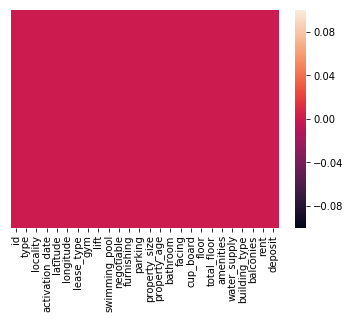

In [6]:
sns.heatmap(data.isnull(),yticklabels=False)

# DATA PREPROCESSING

In [7]:
set(data['locality'].tolist())

{'Purnapragnya Layout',
 'Arehalli, Uttarahalli Hobli',
 'Srinivaspura',
 'Mariyappanapalya',
 'Bellandur,Marathahalli',
 'KEB Rd, Chikka Madivala, 1st Stage, BTM Layout 1, Bengaluru, Karnataka 560068, India,Bengaluru',
 'Pallavaram',
 'Byrasandra, Jaya Nagar 1st Block East',
 ', Hoodi',
 'kasavanahalli',
 'Jeevan Samskruthi Apartment, Shiridi Sai Temple Rd., 4th A Cross, Shirdi Sai Nagar, Munnekollal, Bengaluru, Karnataka 560037, India,Bengaluru',
 'Sarjapur, Bengaluru, Karnataka 562125, India',
 'Cubbonpete, Nagarathpete, Bengaluru, Karnataka, India',
 'Vakil Garden City',
 'HImagiri Enclave II, Abbaiah Reddy Layout, Vignan Nagar, Bengaluru, Karnataka, India',
 'Thyagaraja Nagar, Basavanagudi, Bengaluru, Karnataka, India',
 'Uttarahalli Hobli',
 'M.C.Layout, Vijayanagar',
 'Banashankari 1st  Stage, ',
 'Sarjapur Road, Chikkakannalli, Bengaluru, Karnataka, India',
 'chennasandra',
 'Varsova Layout',
 'Jeevanhalli',
 '10th B Cross Road,Bengaluru',
 'Varthur Kodi',
 'Defence Colony, Ind

In [8]:
#replace address by integer
le=preprocessing.LabelEncoder()
data['locality']=le.fit_transform(data['locality'])
data['locality'].head()

0    1061
1     419
2    1027
3    1443
4    2084
Name: locality, dtype: int64

In [9]:
a=np.unique(data['locality'])
a.shape

(2177,)

In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [11]:
# # integer encode
# label_encoder = LabelEncoder()
# integer_encoded = label_encoder.fit_transform(a)
# print(integer_encoded)
# # binary encode
# onehot_encoder = OneHotEncoder(sparse=False)
# integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
# onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
# print(onehot_encoded)

In [12]:
# sns.set(rc={'figure.figsize':(30,20)})
# sns.countplot(data['locality'])

In [13]:
data.drop(["id","activation_date"],axis=1,inplace=True)

In [14]:
data.head()

,type,locality,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,...,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent,deposit
0,BHK2,1061,12.936601,77.576914,FAMILY,0,0,0,0,SEMI_FURNISHED,...,S,2,2,2,"{""LIFT"":False,""GYM"":False,""INTERNET"":False,""AC...",CORP_BORE,IF,1,22000,220000
1,BHK2,419,12.997989,77.545219,FAMILY,0,0,0,1,SEMI_FURNISHED,...,W,2,0,1,"{""LIFT"":False,""GYM"":False,""INTERNET"":False,""AC...",CORPORATION,IH,0,20000,200000
2,BHK3,1027,12.935696,77.587642,FAMILY,0,1,0,0,SEMI_FURNISHED,...,E,3,4,9,"{""LIFT"":True,""GYM"":False,""INTERNET"":True,""AC"":...",CORPORATION,AP,2,38000,250000
3,BHK2,1443,12.953507,77.656118,FAMILY,0,1,0,1,SEMI_FURNISHED,...,E,2,4,4,"{""LIFT"":True,""GYM"":False,""INTERNET"":True,""AC"":...",BOREWELL,AP,1,30000,300000
4,BHK2,2084,12.968520,77.742436,ANYONE,1,1,1,1,SEMI_FURNISHED,...,E,2,1,9,"{""LIFT"":True,""GYM"":True,""INTERNET"":True,""AC"":F...",CORP_BORE,AP,2,26500,150000


In [15]:
#converting categorical data into numerical
l=preprocessing.LabelEncoder()
data['type']=l.fit_transform(data['type'])
data['lease_type']=l.fit_transform(data['lease_type'])
data['furnishing']=l.fit_transform(data['furnishing'])
data['parking']=l.fit_transform(data['parking'])
data['facing']=l.fit_transform(data['facing'])
data['water_supply']=l.fit_transform(data['water_supply'])
data['building_type']=l.fit_transform(data['building_type'])
data.columns

Index(['type', 'locality', 'latitude', 'longitude', 'lease_type', 'gym',
       'lift', 'swimming_pool', 'negotiable', 'furnishing', 'parking',
       'property_size', 'property_age', 'bathroom', 'facing', 'cup_board',
       'floor', 'total_floor', 'amenities', 'water_supply', 'building_type',
       'balconies', 'rent', 'deposit'],
      dtype='object')

In [16]:
data['amenities']=data['amenities'].str.replace('False','0')
data['amenities']=data['amenities'].str.replace('True','1') 
data.head(10)

,type,locality,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,...,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent,deposit
0,1,1061,12.936601,77.576914,3,0,0,0,0,2,...,4,2,2,2,"{""LIFT"":0,""GYM"":0,""INTERNET"":0,""AC"":0,""CLUB"":0...",2,2,1,22000,220000
1,1,419,12.997989,77.545219,3,0,0,0,1,2,...,7,2,0,1,"{""LIFT"":0,""GYM"":0,""INTERNET"":0,""AC"":0,""CLUB"":0...",1,3,0,20000,200000
2,2,1027,12.935696,77.587642,3,0,1,0,0,2,...,0,3,4,9,"{""LIFT"":1,""GYM"":0,""INTERNET"":1,""AC"":0,""CLUB"":1...",1,0,2,38000,250000
3,1,1443,12.953507,77.656118,3,0,1,0,1,2,...,0,2,4,4,"{""LIFT"":1,""GYM"":0,""INTERNET"":1,""AC"":0,""CLUB"":0...",0,0,1,30000,300000
4,1,2084,12.968520,77.742436,0,1,1,1,1,2,...,0,2,1,9,"{""LIFT"":1,""GYM"":1,""INTERNET"":1,""AC"":0,""CLUB"":1...",2,0,2,26500,150000
5,1,792,12.921999,77.646238,3,0,0,0,1,0,...,1,2,1,4,"{""LIFT"":0,""GYM"":0,""INTERNET"":1,""AC"":0,""CLUB"":0...",2,0,3,30000,175000
6,2,851,12.909958,77.674755,3,0,0,0,0,2,...,7,6,0,2,"{""LIFT"":0,""GYM"":0,""INTERNET"":0,""AC"":0,""CLUB"":0...",0,1,2,35500,216000
7,1,2039,12.964160,77.518935,3,0,0,0,1,2,...,7,2,0,3,"{""LIFT"":0,""GYM"":0,""INTERNET"":1,""AC"":0,""CLUB"":0...",2,0,1,15000,150000
8,0,642,12.970340,77.688801,3,0,0,0,0,2,...,0,1,1,3,"{""PARK"":0,""HK"":0,""LIFT"":0,""PB"":0,""INTERNET"":1,...",1,3,1,11000,50000
9,1,316,12.909464,77.609353,0,0,0,0,1,2,...,0,2,1,2,"{""LIFT"":0,""GYM"":0,""INTERNET"":1,""AC"":0,""CLUB"":0...",1,2,1,14000,60000


In [17]:
data['locality']

0        1061
1         419
2        1027
3        1443
4        2084
5         792
6         851
7        2039
8         642
9         316
10        678
11        635
12       2086
13       2084
14       1638
15        446
16        486
17       1263
18       2084
19        684
20       1492
21       1213
22        362
23       1652
24        419
25        425
26       1325
27       1155
28       1918
29        486
         ... 
24970    1638
24971    2084
24972     362
24973    1325
24974    1840
24975    1123
24976    1643
24977    1178
24978     183
24979     509
24980    1563
24981     209
24982     972
24983     257
24984     539
24985    1468
24986     595
24987    1468
24988     316
24989     965
24990     379
24991     882
24992    2084
24993    1627
24994    2084
24995     649
24996     509
24997    1325
24998    1877
24999    1427
Name: locality, Length: 25000, dtype: int64

In [18]:
df2 = data
df2["amenities"] = df2["amenities"].apply(lambda x : dict(eval(str(x))))
df3 = df2["amenities"].apply(pd.Series )
df3.head()

,LIFT,GYM,INTERNET,AC,CLUB,INTERCOM,POOL,CPA,FS,SERVANT,SECURITY,SC,GP,PARK,RWH,STP,HK,PB,VP
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0


In [19]:
result = pd.concat([data, df3], axis=1).drop('amenities', axis=1)
result.iloc[1]

type                  1.000000
locality            419.000000
latitude             12.997989
longitude            77.545219
lease_type            3.000000
gym                   0.000000
lift                  0.000000
swimming_pool         0.000000
negotiable            1.000000
furnishing            2.000000
parking               0.000000
property_size      1218.000000
property_age         20.000000
bathroom              3.000000
facing                7.000000
cup_board             2.000000
floor                 0.000000
total_floor           1.000000
water_supply          1.000000
building_type         3.000000
balconies             0.000000
rent              20000.000000
deposit          200000.000000
LIFT                  0.000000
GYM                   0.000000
INTERNET              0.000000
AC                    0.000000
CLUB                  0.000000
INTERCOM              0.000000
POOL                  0.000000
CPA                   1.000000
FS                    0.000000
SERVANT 

In [20]:
a=np.unique(data['lease_type'])
a

array([0, 1, 2, 3], dtype=int64)

In [21]:
result.isnull().sum()

type                0
locality            0
latitude            0
longitude           0
lease_type          0
gym                 0
lift                0
swimming_pool       0
negotiable          0
furnishing          0
parking             0
property_size       0
property_age        0
bathroom            0
facing              0
cup_board           0
floor               0
total_floor         0
water_supply        0
building_type       0
balconies           0
rent                0
deposit             0
LIFT                0
GYM                82
INTERNET            0
AC                  0
CLUB             1283
INTERCOM            0
POOL                0
CPA              1283
FS                  0
SERVANT          1283
SECURITY            0
SC                  0
GP               1283
PARK                0
RWH              1283
STP              1283
HK                  0
PB                  0
VP               1283
dtype: int64

In [22]:
result.drop(['GYM','LIFT','POOL'],axis=1,inplace=True)

In [23]:
result[['CLUB','CPA','GP','RWH','SERVANT','STP','VP']] = result[['CLUB','CPA','GP','RWH','SERVANT','STP','VP']].fillna(0,axis = 1,inplace=False)

In [24]:
result

,type,locality,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,...,SERVANT,SECURITY,SC,GP,PARK,RWH,STP,HK,PB,VP
0,1,1061,12.936601,77.576914,3,0,0,0,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,419,12.997989,77.545219,3,0,0,0,1,2,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2,1027,12.935696,77.587642,3,0,1,0,0,2,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
3,1,1443,12.953507,77.656118,3,0,1,0,1,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,1,2084,12.968520,77.742436,0,1,1,1,1,2,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
5,1,792,12.921999,77.646238,3,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2,851,12.909958,77.674755,3,0,0,0,0,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1,2039,12.964160,77.518935,3,0,0,0,1,2,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,0,642,12.970340,77.688801,3,0,0,0,0,2,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1,316,12.909464,77.609353,0,0,0,0,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
result.isnull().sum()

type             0
locality         0
latitude         0
longitude        0
lease_type       0
gym              0
lift             0
swimming_pool    0
negotiable       0
furnishing       0
parking          0
property_size    0
property_age     0
bathroom         0
facing           0
cup_board        0
floor            0
total_floor      0
water_supply     0
building_type    0
balconies        0
rent             0
deposit          0
INTERNET         0
AC               0
CLUB             0
INTERCOM         0
CPA              0
FS               0
SERVANT          0
SECURITY         0
SC               0
GP               0
PARK             0
RWH              0
STP              0
HK               0
PB               0
VP               0
dtype: int64

In [26]:
result

,type,locality,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,...,SERVANT,SECURITY,SC,GP,PARK,RWH,STP,HK,PB,VP
0,1,1061,12.936601,77.576914,3,0,0,0,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,419,12.997989,77.545219,3,0,0,0,1,2,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2,1027,12.935696,77.587642,3,0,1,0,0,2,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
3,1,1443,12.953507,77.656118,3,0,1,0,1,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,1,2084,12.968520,77.742436,0,1,1,1,1,2,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
5,1,792,12.921999,77.646238,3,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2,851,12.909958,77.674755,3,0,0,0,0,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1,2039,12.964160,77.518935,3,0,0,0,1,2,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,0,642,12.970340,77.688801,3,0,0,0,0,2,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1,316,12.909464,77.609353,0,0,0,0,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


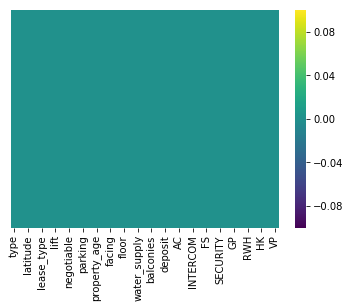

In [27]:
sns.heatmap(result.isnull(),yticklabels=False,cmap = 'viridis')

In [28]:
# from scipy import stats
# import numpy as np
# z = np.abs(stats.zscore(result))
# print(z)

In [29]:
# threshold = 3
# print(np.where(z > 3))

In [30]:
# result= result[(z < 3).all(axis=1)]

[0.02403345 0.06737468 0.07123075 0.07702027 0.02805887 0.0065029
 0.00626291 0.0045463  0.01938109 0.01233059 0.02349323 0.07234595
 0.06354059 0.02083282 0.0488587  0.04075796 0.0519796  0.05295945
 0.03846777 0.01847859 0.03771789 0.0280502  0.00447254 0.00496536
 0.00782409 0.01454652 0.00970009 0.00460275 0.01035993 0.02631682
 0.01041533 0.02391958 0.01694686 0.01316752 0.01253262 0.00956798
 0.01643744]


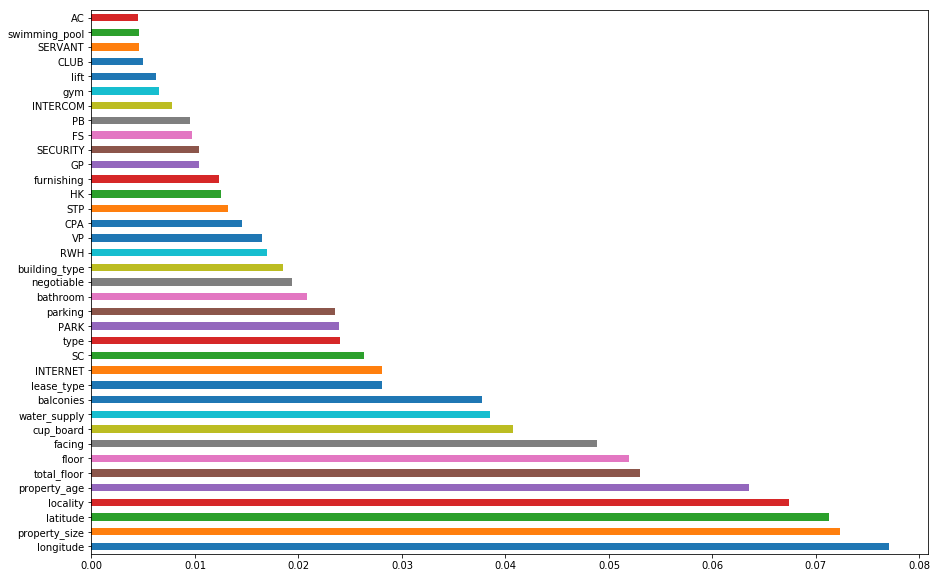

In [31]:
pt.figure(figsize=(15,10))
x=result.drop(['rent','deposit'],axis=1)
y=result['rent']
model=ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)
feat_importances=pd.Series(model.feature_importances_,index=x.columns)
feat_importances.nlargest(37).plot(kind='barh')
pt.show()

C:\Users\Kaustubh Sahu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


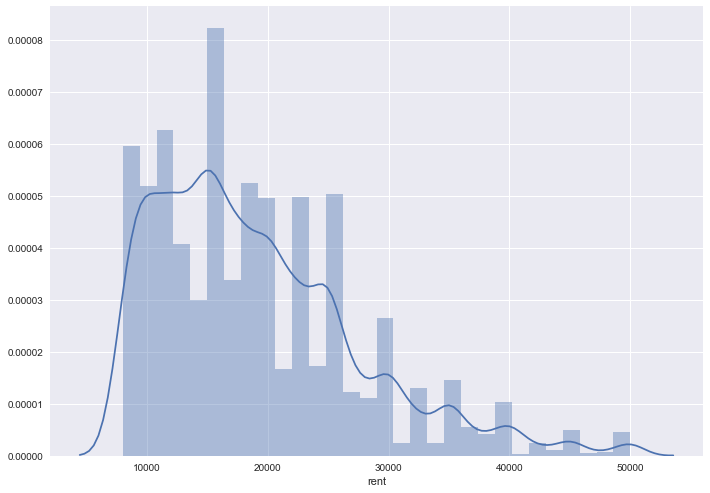

In [32]:
# set the size of the figure
sns.set(rc={'figure.figsize':(11.7,8.27)})

# plot a histogram showing the distribution of the target values
sns.distplot(result['rent'], bins=30)
pt.show()

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [34]:
x_train.head(0)

,type,locality,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,...,SERVANT,SECURITY,SC,GP,PARK,RWH,STP,HK,PB,VP


# APPLY MODEL

In [35]:
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans

In [36]:
clf = RandomForestRegressor(n_estimators=45)
clf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=45, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [37]:
score=clf.score(x_test,y_test)
print(score)

0.8132789127355786


In [38]:
pred=clf.predict(x_test)
df4=pd.DataFrame({'Actual':y_test,'predicted':pred})
df4

,Actual,predicted
18693,11000,12102.222222
12948,25000,19055.555556
9411,20000,12713.333333
9772,12500,10813.333333
13845,25000,30200.000000
8336,35000,29144.444444
12295,20000,23688.888889
10940,20000,20777.777778
5008,8500,11845.555556
1923,10000,12040.000000


In [39]:
print(metrics.mean_absolute_error(y_test,pred))
print(metrics.mean_squared_error(y_test,pred))
print(np.sqrt(metrics.mean_squared_error(y_test,pred)))

2534.2350755555553
12822917.337456593
3580.9101269728335


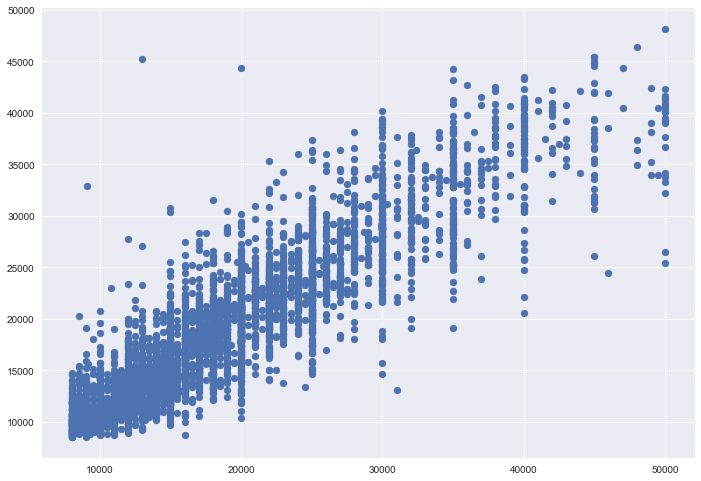

In [40]:
pt.scatter(y_test,pred)
pt.show()

In [41]:
import pickle

In [42]:
pickle.dump(clf,
           open('model.pkl', 'wb'))

In [43]:
model = pickle.load(open('model.pkl','rb'))

In [44]:
#y_test.loc[1]

In [45]:
c=np.array(x_test.iloc[1]).reshape(1,37)

In [46]:
len(c[0])

37

In [47]:
w = [1.00000000e+00, 9.65000000e+02, 1.29065457e+01, 7.75912731e+01,
        3.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 2.00000000e+00, 0.00000000e+00, 1.20000000e+03,
        1.00000000e+01, 2.00000000e+00, 7.00000000e+00, 2.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 2.00000000e+00, 2.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        1.00000000e+00]

In [48]:
clf.predict(np.array(w).reshape(1,37))

array([17888.88888889])